In [66]:
# Importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy

%matplotlib inline

In [67]:
practical_raw_data = pd.ExcelFile('practical_raw_data.xlsx')

In [68]:
# Loading and renaming the cols of the sheet,'raw data A'
raw_data_A = practical_raw_data.parse('raw data A')
raw_data_A.rename(columns={'Account Holder ID':'AccountHolderID', 'Approval Date':'ApprovalDate'}, inplace=True)

In [69]:
# Formatting the dates in raw_data_A
raw_data_A['transactionDate'] = pd.to_datetime(raw_data_A.transactionDate)
raw_data_A['ApprovalDate'] = pd.to_datetime(raw_data_A.ApprovalDate)

In [70]:
# Loading the dataset, 'raw data B.txt'
raw_data_B = pd.read_csv('raw data B.txt', sep=',', header=0)

In [71]:
# The column names of raw_data_B
raw_data_B.columns

Index(['Unnamed: 0', 'balance', 'clientId', 'transactionDate', 'amount', '__v',
       'type_', 'Account Holder ID', 'Approval Date', ' tx_recency   '],
      dtype='object')

In [72]:
# Renaming the cols of raw_data_B
raw_data_B.rename(columns={'Unnamed: 0': 'Unnamed', 'Account Holder ID':'AccountHolderID', 'Approval Date':'ApprovalDate', ' tx_recency   ':'tx_recency'}, inplace=True)

In [73]:
# Deleted column 'Unnamed'
del raw_data_B['Unnamed']

In [74]:
# Formatting the dates in raw_data_B
raw_data_B['transactionDate'] = pd.to_datetime(raw_data_B.transactionDate)
raw_data_B['ApprovalDate'] = pd.to_datetime(raw_data_B.ApprovalDate)

In [75]:
# Brief description of raw_data_A
raw_data_A.describe()

,Unnamed: 0,balance,clientId,amount,__v,AccountHolderID,tx_recency
count,36.000000,3.600000e+01,36.0,3.600000e+01,36.0,36.0,36.000000
mean,17.500000,1.130672e+06,44291.0,3.273472e+05,0.0,44291.0,3.861111
std,10.535654,1.226898e+06,0.0,3.923341e+05,0.0,0.0,1.914647
min,0.000000,2.853300e+04,44291.0,1.000000e+03,0.0,44291.0,0.000000
25%,8.750000,3.169340e+05,44291.0,5.000000e+04,0.0,44291.0,2.000000
50%,17.500000,8.065720e+05,44291.0,2.010000e+05,0.0,44291.0,4.000000
75%,26.250000,1.509857e+06,44291.0,5.000000e+05,0.0,44291.0,6.000000
max,35.000000,5.006798e+06,44291.0,2.000000e+06,0.0,44291.0,6.000000


In [76]:
# Brief description of raw_data_B
raw_data_B.describe()

,balance,clientId,amount,__v,AccountHolderID
count,1.640000e+02,1.640000e+02,1.640000e+02,164.0,1.640000e+02
mean,4.696680e+06,4.001545e+08,9.283861e+05,0.0,4.001545e+08
std,5.459238e+06,7.789916e+07,2.480297e+06,0.0,7.789916e+07
min,1.008000e+03,4.429100e+04,5.000000e+02,0.0,4.429100e+04
25%,5.464610e+05,4.149005e+08,1.000000e+04,0.0,4.149005e+08
50%,1.988043e+06,4.152978e+08,5.000000e+04,0.0,4.152978e+08
75%,9.025439e+06,4.157507e+08,7.000000e+05,0.0,4.157507e+08
max,1.825887e+07,4.157507e+08,1.500000e+07,0.0,4.157507e+08


414900500    70
415750696    58
415297800    30
44291         4
4826765       2
Name: AccountHolderID, dtype: int64 414900500    70
415750696    58
415297800    30
44291         4
4826765       2
Name: clientId, dtype: int64


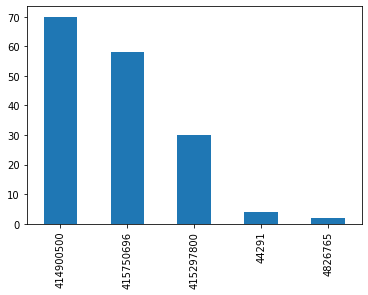

In [77]:
# Checking out and comparing 'AccountHolderID' with 'clientId'
acc_holderId_B = raw_data_B['AccountHolderID'].value_counts()
clientId_B = raw_data_B['clientId'].value_counts()
print(acc_holderId_B, clientId_B)
clientId_B.plot(kind='bar')

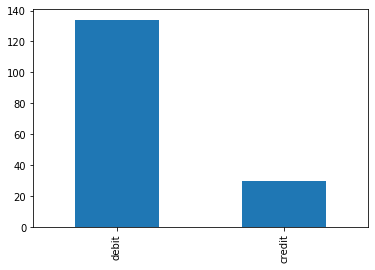

In [78]:
# Checking out 'type_'column
type_B = raw_data_B['type_'].value_counts()
type_B.plot(kind='bar')

In [81]:
raw_data_B[raw_data_B['clientId'] == 44291]

,balance,clientId,transactionDate,amount,__v,type_,AccountHolderID,ApprovalDate,tx_recency
0,833298,44291,2016-06-16 07:43:00,200000.0,0,debit,44291,2016-06-16 18:21:44,-
1,626798,44291,2016-06-16 07:47:00,200000.0,0,debit,44291,2016-06-16 18:21:44,-
2,605198,44291,2016-06-16 13:23:00,20000.0,0,debit,44291,2016-06-16 18:21:44,-
3,258846,44291,2016-06-16 13:38:04,200000.0,0,credit,44291,2016-06-16 18:21:44,-


In [82]:
raw_data_A[raw_data_A['clientId'] == 44291].head()

,Unnamed: 0,balance,clientId,transactionDate,amount,__v,type_,AccountHolderID,ApprovalDate,tx_recency
0,0,2038533,44291,2016-06-09 22:10:47.499,2000000,0,credit,44291,2016-06-16 18:21:44,6
1,1,2038533,44291,2016-06-09 22:11:47.907,1000,0,debit,44291,2016-06-16 18:21:44,6
2,2,61698,44291,2016-06-10 10:16:00.000,400000,0,debit,44291,2016-06-16 18:21:44,6
3,3,1538533,44291,2016-06-10 10:20:37.938,500000,0,debit,44291,2016-06-16 18:21:44,6
4,4,561698,44291,2016-06-10 10:55:00.000,500000,0,credit,44291,2016-06-16 18:21:44,6


In [83]:
# The median of 'tx_recency' for raw_data_A
np.median(raw_data_A['tx_recency'])

4.0

In [84]:
# The min value of 'tx_recency' for raw_data_A
np.min(raw_data_A['tx_recency'])

0

In [85]:
raw_data_B['tx_recency'][1]

' -   '

2016-10-31 12:38:22    70
2017-02-16 10:05:13    58
2016-06-24 21:50:54    30
2016-06-16 18:21:44     4
2016-08-10 16:47:59     2
Name: ApprovalDate, dtype: int64


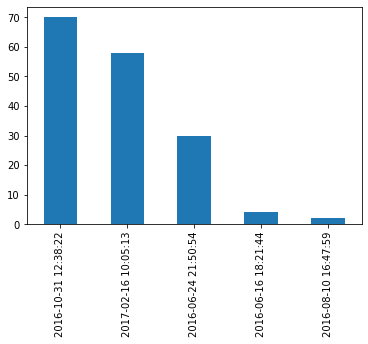

In [86]:
# Checking out 'ApprovalDate' column of raw_data_B
approval_date_B = raw_data_B['ApprovalDate'].value_counts()
print(approval_date_B)
approval_date_B.plot(kind='bar')

In [88]:
# Joined the two datasets, raw_data_A and raw_data_B
joined_raw_data = pd.concat([raw_data_A, raw_data_B], axis=0, ignore_index=True, sort=True)
joined_raw_data

,AccountHolderID,ApprovalDate,Unnamed: 0,__v,amount,balance,clientId,transactionDate,tx_recency,type_
0,44291,2016-06-16 18:21:44,0.0,0,2000000.0,2038533,44291,2016-06-09 22:10:47.499,6,credit
1,44291,2016-06-16 18:21:44,1.0,0,1000.0,2038533,44291,2016-06-09 22:11:47.907,6,debit
2,44291,2016-06-16 18:21:44,2.0,0,400000.0,61698,44291,2016-06-10 10:16:00.000,6,debit
3,44291,2016-06-16 18:21:44,3.0,0,500000.0,1538533,44291,2016-06-10 10:20:37.938,6,debit
4,44291,2016-06-16 18:21:44,4.0,0,500000.0,561698,44291,2016-06-10 10:55:00.000,6,credit
...,...,...,...,...,...,...,...,...,...,...
195,415750696,2017-02-16 10:05:13,NaN,0,500.0,11226339,415750696,2017-08-02 10:22:34.000,7,debit
196,415750696,2017-02-16 10:05:13,NaN,0,500.0,8576339,415750696,2017-08-02 12:04:11.000,7,debit
197,415750696,2017-02-16 10:05:13,NaN,0,10000.0,8576339,415750696,2017-08-02 12:05:22.000,7,debit
198,415750696,2017-02-16 10:05:13,NaN,0,2640000.0,8586339,415750696,2017-08-02 12:06:22.000,7,debit


 8       32
6        12
 12      11
 13      11
 7       10
 16      10
2         8
 9        8
 24       8
 17       7
 20       6
 15       6
 11       6
 14       6
4         5
3         5
 -        5
 26       5
 1        4
 18       4
 23       3
 29       3
 19       3
5         3
0         2
 3        2
 2        2
 21       2
 25       2
 27       2
 22       2
 6        1
 28       1
 10       1
1         1
 5        1
Name: tx_recency, dtype: int64


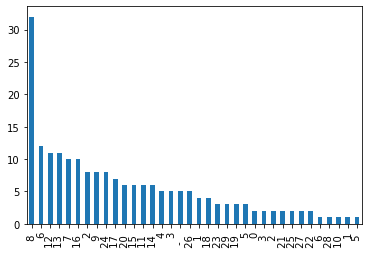

In [93]:
# Explored the 'tx_recency' column of the joined dataset, joined_raw_data
joined_tx_recency = joined_raw_data['tx_recency'].value_counts()
print(joined_tx_recency)
joined_tx_recency.plot(kind='bar')

In [90]:
type(joined_raw_data['tx_recency'][1])

int

In [94]:
# From the bar graph, only the string ' -   ' cannot be converted to integer.
# So, we explored the rows where it is the value for 'tx-recency'
joined_raw_data[joined_raw_data['tx_recency'] == ' -   ']

,AccountHolderID,ApprovalDate,Unnamed: 0,__v,amount,balance,clientId,transactionDate,tx_recency,type_
36,44291,2016-06-16 18:21:44,NaN,0,200000.0,833298,44291,2016-06-16 07:43:00,-,debit
37,44291,2016-06-16 18:21:44,NaN,0,200000.0,626798,44291,2016-06-16 07:47:00,-,debit
38,44291,2016-06-16 18:21:44,NaN,0,20000.0,605198,44291,2016-06-16 13:23:00,-,debit
39,44291,2016-06-16 18:21:44,NaN,0,200000.0,258846,44291,2016-06-16 13:38:04,-,credit
111,414900500,2016-10-31 12:38:22,NaN,0,1000.0,1008,414900500,2016-10-31 09:56:50,-,debit


In [95]:
# Replacing the value, ' -  ' with NaN
joined_raw_data.loc[joined_raw_data["tx_recency"] == ' -   ', "tx_recency"] = np.nan

In [96]:
joined_raw_data[joined_raw_data['tx_recency'].isnull()]

,AccountHolderID,ApprovalDate,Unnamed: 0,__v,amount,balance,clientId,transactionDate,tx_recency,type_
36,44291,2016-06-16 18:21:44,NaN,0,200000.0,833298,44291,2016-06-16 07:43:00,NaN,debit
37,44291,2016-06-16 18:21:44,NaN,0,200000.0,626798,44291,2016-06-16 07:47:00,NaN,debit
38,44291,2016-06-16 18:21:44,NaN,0,20000.0,605198,44291,2016-06-16 13:23:00,NaN,debit
39,44291,2016-06-16 18:21:44,NaN,0,200000.0,258846,44291,2016-06-16 13:38:04,NaN,credit
111,414900500,2016-10-31 12:38:22,NaN,0,1000.0,1008,414900500,2016-10-31 09:56:50,NaN,debit


In [97]:
# Converting all strings, excepting NaN, to integer
joined_raw_data['tx_recency'] = joined_raw_data['tx_recency'].apply(lambda x: int(x) if(np.all(pd.notnull(x))) else x)
rectified_tx_recency = joined_raw_data['tx_recency'].value_counts()
rectified_tx_recency[:2]

8.0     32
6.0     13
12.0    11
13.0    11
2.0     10
Name: tx_recency, dtype: int64

In [98]:
joined_raw_data.head(10)

,AccountHolderID,ApprovalDate,Unnamed: 0,__v,amount,balance,clientId,transactionDate,tx_recency,type_
0,44291,2016-06-16 18:21:44,0.0,0,2000000.0,2038533,44291,2016-06-09 22:10:47.499,6.0,credit
1,44291,2016-06-16 18:21:44,1.0,0,1000.0,2038533,44291,2016-06-09 22:11:47.907,6.0,debit
2,44291,2016-06-16 18:21:44,2.0,0,400000.0,61698,44291,2016-06-10 10:16:00.000,6.0,debit
3,44291,2016-06-16 18:21:44,3.0,0,500000.0,1538533,44291,2016-06-10 10:20:37.938,6.0,debit
4,44291,2016-06-16 18:21:44,4.0,0,500000.0,561698,44291,2016-06-10 10:55:00.000,6.0,credit
5,44291,2016-06-16 18:21:44,5.0,0,50000.0,511698,44291,2016-06-10 11:09:00.000,6.0,debit
6,44291,2016-06-16 18:21:44,6.0,0,202000.0,309698,44291,2016-06-10 12:56:00.000,6.0,debit
7,44291,2016-06-16 18:21:44,7.0,0,300000.0,1238533,44291,2016-06-10 14:11:05.965,6.0,debit
8,44291,2016-06-16 18:21:44,8.0,0,600000.0,628533,44291,2016-06-10 14:12:42.538,6.0,debit
9,44291,2016-06-16 18:21:44,9.0,0,10000.0,628533,44291,2016-06-10 14:13:35.114,6.0,debit


In [99]:
# Assigning the variables holding the NaN value of 'tx_recency' with the min value of the same column
joined_raw_data["tx_recency"] = joined_raw_data["tx_recency"].fillna(joined_raw_data["tx_recency"].min())
joined_raw_data["tx_recency"].describe()

count    200.000000
mean      11.555000
std        7.378972
min        0.000000
25%        6.000000
50%        9.000000
75%       16.000000
max       29.000000
Name: tx_recency, dtype: float64

2016-10-31 12:38:22    70
2017-02-16 10:05:13    58
2016-06-16 18:21:44    40
2016-06-24 21:50:54    30
2016-08-10 16:47:59     2
Name: ApprovalDate, dtype: int64


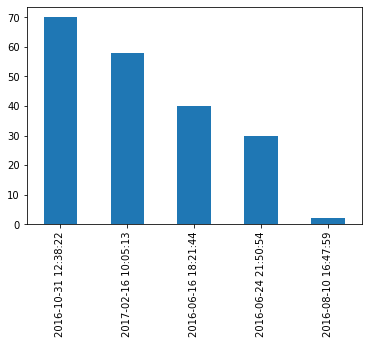

In [100]:
# Exploring the 'ApprovalDate' of the joined_raw_data
joined_approval_date = joined_raw_data['ApprovalDate'].value_counts()
print(joined_approval_date)
joined_approval_date.plot(kind='bar')

In [101]:
# The data types of the joined data set
joined_raw_data.dtypes

AccountHolderID             int64
ApprovalDate       datetime64[ns]
Unnamed: 0                float64
__v                         int64
amount                    float64
balance                     int64
clientId                    int64
transactionDate    datetime64[ns]
tx_recency                float64
type_                      object
dtype: object

In [102]:
# Found the differences btw the two date columns. It'll be used to calculate days before or after 'ApprovalDate'
joined_raw_data['date_diff'] = joined_raw_data['transactionDate'] - joined_raw_data['ApprovalDate']
joined_raw_data.date_diff = joined_raw_data.date_diff.dt.days

In [103]:
joined_raw_data.head()

,AccountHolderID,ApprovalDate,Unnamed: 0,__v,amount,balance,clientId,transactionDate,tx_recency,type_,date_diff
0,44291,2016-06-16 18:21:44,0.0,0,2000000.0,2038533,44291,2016-06-09 22:10:47.499,6.0,credit,-7
1,44291,2016-06-16 18:21:44,1.0,0,1000.0,2038533,44291,2016-06-09 22:11:47.907,6.0,debit,-7
2,44291,2016-06-16 18:21:44,2.0,0,400000.0,61698,44291,2016-06-10 10:16:00.000,6.0,debit,-7
3,44291,2016-06-16 18:21:44,3.0,0,500000.0,1538533,44291,2016-06-10 10:20:37.938,6.0,debit,-7
4,44291,2016-06-16 18:21:44,4.0,0,500000.0,561698,44291,2016-06-10 10:55:00.000,6.0,credit,-7


In [104]:
# Dataset for five days before 'ApprovalDate'
five_days_before = joined_raw_data[(joined_raw_data['date_diff'] >= -5) & (joined_raw_data['date_diff'] < 0)]

In [105]:
# Dataset for ten days before 'ApprovalDate'
ten_days_before = joined_raw_data[(joined_raw_data['date_diff'] >= -10) & (joined_raw_data['date_diff'] < 0)]

In [106]:
# Dataset for fifteen days before 'ApprovalDate'
fifteen_days_before = joined_raw_data[(joined_raw_data['date_diff'] >= -15) & (joined_raw_data['date_diff'] < 0)]

In [107]:
# Dataset for one week after 'ApprovalDate'
one_week_after = joined_raw_data[(joined_raw_data['date_diff'] > 0) & (joined_raw_data['date_diff'] <= 7)]

In [108]:
# joined_raw_data[(joined_raw_data.date_diff > 0) & (joined_raw_data.date_diff < 49)]

In [109]:
# The Client's ID for the five clients
joined_raw_data['clientId'].unique()

array([    44291,   4826765, 414900500, 415297800, 415750696], dtype=int64)

In [110]:
# Statistics For Transactions before Approval Date
def table_before(c_id, days):
    dictionary = {}
    
    
    no_of_transact = len(days[days['clientId'] == c_id])
    value_of_transact = days[days['clientId'] == c_id]['amount'].sum()
    lowest_balance = days[days['clientId'] == c_id]['balance'].min()
    highest_balance = days[days['clientId'] == c_id]['balance'].max()
    no_of_credits = len(days[(days['type_'] == 'credit') & (days['clientId'] == c_id)])
    no_of_debits = len(days[(days['type_'] == 'debit') & (days['clientId'] == c_id)])
    
    dictionary['Number of Transactions'] = no_of_transact
    dictionary['Value of Transactions'] = value_of_transact
    dictionary['Lowest Balance'] = lowest_balance
    dictionary['Highest Balance'] = highest_balance
    dictionary['Number of Credits'] = no_of_credits
    dictionary['Number of Debits'] = no_of_debits
    
#     dictionary = {'Number Of Transactions': no_of_transact, 'Value Of Transactions': value_of_transact, 'Lowest Balance': lowest_balance,
#                  'Highest Balance': highest_balance, 'Number Of Credits': no_of_credits, 'Number Of Debits': no_of_debits}
    
    return dictionary

# Statistics For Transactions after Approval Date
def table_after(c_id, days):
    dictionary = {}
    
    no_of_transact = len(days[days['clientId'] == c_id])
    
    dictionary['Number of Transactions'] = no_of_transact
    
    return dictionary

In [111]:
# Data Frames For the Transactions
def dataframes(c_id):
    five_c_id = table_before(c_id, five_days_before)
    ten_c_id = table_before(c_id, ten_days_before)
    fifteen_c_id = table_before(c_id, fifteen_days_before)
    one_wk_c_id = table_after(c_id, one_week_after)
    
    five_c_id_df = pd.Series(five_c_id, name='five_days_before')
    ten_c_id_df = pd.Series(ten_c_id, name='ten_days_before')
    fifteen_c_id_df = pd.Series(fifteen_c_id, name='fifteen_days_before')
    one_wk_c_id_df = pd.Series(one_wk_c_id, name='one_week_after')
    
    c_id_df = pd.DataFrame(five_c_id_df).join(ten_c_id_df).join(fifteen_c_id_df).join(one_wk_c_id_df)
    return c_id_df


dict_df = {44291:dataframes(44291), 4826765:dataframes(4826765), 414900500:dataframes(414900500), 415297800:dataframes(415297800), 415750696:dataframes(415750696)}
results_df = pd.concat(dict_df)

results_df
dataframes(44291)

,five_days_before,ten_days_before,fifteen_days_before,one_week_after
Number of Transactions,25.0,40.0,40.0,0.0
Value of Transactions,6541000.0,12404500.0,12404500.0,NaN
Lowest Balance,28533.0,28533.0,28533.0,NaN
Highest Balance,5006798.0,5006798.0,5006798.0,NaN
Number of Credits,2.0,4.0,4.0,NaN
Number of Debits,23.0,36.0,36.0,NaN


In [112]:
# Saving the results to a CSV file
results_df.to_csv("table_.csv", index=True)

In [113]:
results_df

five_days_before  ten_days_before  \
44291     Number of Transactions              25.0             40.0   
          Value of Transactions          6541000.0       12404500.0   
          Lowest Balance                   28533.0          28533.0   
          Highest Balance                5006798.0        5006798.0   
          Number of Credits                    2.0              4.0   
          Number of Debits                    23.0             36.0   
4826765   Number of Transactions               0.0              0.0   
          Value of Transactions                0.0              0.0   
          Lowest Balance                       NaN              NaN   
          Highest Balance                      NaN              NaN   
          Number of Credits                    0.0              0.0   
          Number of Debits                     0.0              0.0   
414900500 Number of Transactions               9.0             16.0   
          Value of Transactions          2666200.0        4304700.0   
          Lowest Balance                    1008.0           1008.0   
          Highest Balance                2172418.0        3011018.0   
          Number of Credits                    1.0              2.0   
          Number of Debits                     8.0             14.0   
415297800 Number of Transactions               0.0              0.0   
          Value of Transactions                0.0              0.0   
          Lowest Balance                       NaN              NaN   
          Highest Balance                      NaN              NaN   
          Number of Credits                    0.0              0.0   
          Number of Debits                     0.0              0.0   
415750696 Number of Transactions               0.0              0.0   
          Value of Transactions                0.0              0.0   
          Lowest Balance                       NaN              NaN   
          Highest Balance                      NaN              NaN   
          Number of Credits                    0.0              0.0   
          Number of Debits                     0.0              0.0   

                                  fifteen_days_before  one_week_after  
44291     Number of Transactions                 40.0             0.0  
          Value of Transactions            12404500.0             NaN  
          Lowest Balance                      28533.0             NaN  
          Highest Balance                   5006798.0             NaN  
          Number of Credits                       4.0             NaN  
          Number of Debits                       36.0             NaN  
4826765   Number of Transactions                  0.0             0.0  
          Value of Transactions                   0.0             NaN  
          Lowest Balance                          NaN             NaN  
          Highest Balance                         NaN             NaN  
          Number of Credits                       0.0             NaN  
          Number of Debits                        0.0             NaN  
414900500 Number of Transactions                 30.0             0.0  
          Value of Transactions            10668700.0             NaN  
          Lowest Balance                       1008.0             NaN  
          Highest Balance                   3905218.0             NaN  
          Number of Credits                       8.0             NaN  
          Number of Debits                       22.0             NaN  
415297800 Number of Transactions                  1.0             0.0  
          Value of Transactions               10000.0             NaN  
          Lowest Balance                     104327.0             NaN  
          Highest Balance                    104327.0             NaN  
          Number of Credits                       0.0             NaN  
          Number of Debits                        1.0             NaN  
415750696 Number of Transactions